In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

from sklearn import preprocessing
from keras.utils import to_categorical

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import datetime
import pickle

from scipy import interpolate
from math import pi, cos, sin,atan
import math

In [2]:
SIZE = 32

#Capture training data and labels into respective lists
train_images = []
train_labels = [] 

for directory_path in glob.glob('../Data/SFA_kitkat/Train/*'):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)

#Convert lists to arrays        
train_images = np.array(train_images)
train_labels = np.array(train_labels)


# Capture test/validation data and labels into respective lists

test_images = []
test_labels = [] 
for directory_path in glob.glob('../Data/SFA_kitkat/Test/*'):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
        
for directory_path in glob.glob('../Data/SFA_kitkat/Validation/*'):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

#Convert lists to arrays                
test_images = np.array(test_images)
test_labels = np.array(test_labels)

#Encode labels from text to integers.
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

###################################################################
# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#One hot encode y values for neural network. 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

#############################
#Load model wothout classifier/fully connected layers
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False


#Now, let us use features from convolutional network for RF
feature_extractor=VGG_model.predict(x_train)

features = feature_extractor.reshape(feature_extractor.shape[0], -1)

#Send test data through same feature extractor process
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

Asian
Black
White
251/251 [==============================] - 28s 110ms/step


Started at 2023-06-14 09:53:36.553151
Done at 2023-06-14 10:09:45.079741
La meilleur accuracy est  0.6266716660417447  pour n_estimators =  266


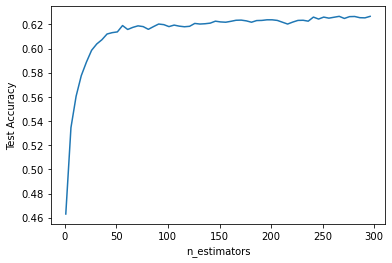

In [4]:
X_for_RF = features #This is our X input to RF

ACC = []
IDs = []
cm = 0
best = 0
bestEval = 0
print('Started at '+str(datetime.datetime.now()))
for es in range(1,300,5):
    RF_model = RandomForestClassifier(n_estimators = es, random_state = 42)

    # Train the model on training data
    RF_model.fit(X_for_RF, y_train) #For sklearn no one hot encoding

    #Now predict using the trained RF model. 
    prediction_RF = RF_model.predict(X_test_features)
    #Inverse le transform to get original label back. 
    prediction_RF = le.inverse_transform(prediction_RF)
    
    a = metrics.accuracy_score(test_labels, prediction_RF)
    if(a>bestEval):
        cm = confusion_matrix(test_labels, prediction_RF)
        bestEval = a
        best = es
    ACC.append(a)
    IDs.append(es)
    
print('Done at '+str(datetime.datetime.now()))

plt.plot(IDs,ACC)
plt.xlabel('n_estimators')
plt.ylabel('Test Accuracy')
print('La meilleur accuracy est ',bestEval,' pour n_estimators = ',best)

<AxesSubplot:>

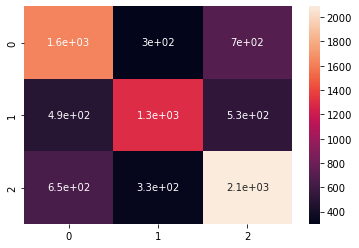

In [5]:
sns.heatmap(cm, annot=True)

Started for C =  2  at 2023-06-14 10:24:14.131583
Started for C =  3  at 2023-06-14 10:27:41.874639
Started for C =  4  at 2023-06-14 10:31:08.754926
Started for C =  5  at 2023-06-14 10:34:39.218942
Started for C =  6  at 2023-06-14 10:37:56.247333
Started for C =  7  at 2023-06-14 10:41:15.823701
Started for C =  8  at 2023-06-14 10:44:35.687637
Started for C =  9  at 2023-06-14 10:47:49.081184
Started for C =  10  at 2023-06-14 10:51:05.537158
Started for C =  11  at 2023-06-14 10:54:17.974954
Started for C =  12  at 2023-06-14 10:57:28.843338
Started for C =  13  at 2023-06-14 11:00:42.042407
Started for C =  14  at 2023-06-14 11:03:54.360448
Started for C =  15  at 2023-06-14 11:07:05.126252
Started for C =  16  at 2023-06-14 11:10:22.979465
Started for C =  17  at 2023-06-14 11:13:37.935573
Started for C =  18  at 2023-06-14 11:16:51.588365
Started for C =  19  at 2023-06-14 11:20:04.028195
La meilleur accuracy est  0.6105486814148231  pour C =  18


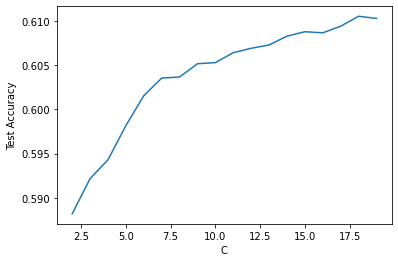

In [5]:
X_for_SVM = features #This is our X input to RF

ACC = []
IDs = []
cm = 0
best = 0
bestEval = 0
for c in range(2,20):
# SVM
    print('Started for C = ',c,' at '+str(datetime.datetime.now()))

    SVM_model = SVC(C = c)

# Train the model on training data
    SVM_model.fit(X_for_SVM, y_train)

# Predict using the trained SVM model
    prediction_SVM = SVM_model.predict(X_test_features)

# Inverse transform to get original label back
    prediction_SVM = le.inverse_transform(prediction_SVM)
    
    a = metrics.accuracy_score(test_labels, prediction_SVM)
    if(a>bestEval):
        cm = confusion_matrix(test_labels, prediction_SVM)
        bestEval = a
        best = c
    ACC.append(a)
    IDs.append(c)

plt.plot(IDs,ACC)
plt.xlabel('C')
plt.ylabel('Test Accuracy')
print('La meilleur accuracy est ',bestEval,' pour C = ',best)

<AxesSubplot:>

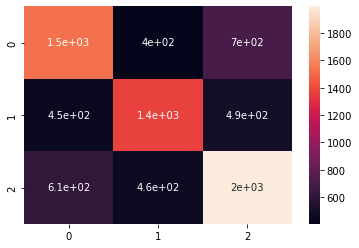

In [6]:
sns.heatmap(cm, annot=True)

# Préparer la classification

In [10]:
RF_model = RandomForestClassifier(n_estimators = 266, random_state = 42)

# Train the model on training data
RF_model.fit(features, y_train) #For sklearn no one hot encoding

pickle.dump(RF_model, open("RFModel.sav", 'wb'))
pickle.dump(le, open("Encoder.sav", 'wb'))

# Classifier

In [3]:
SIZE = 32
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

for layer in VGG_model.layers:
    layer.trainable = False
    
RF_model = pickle.load(open("RFModel.sav", 'rb'))
le = pickle.load(open("Encoder.sav", 'rb'))

class Ellipse:
    def __init__(self,clus,H1,H2,S1,S2,T):
        self.cluster = clus
        self.HMoy = H1
        self.SMoy = S1
        self.HEct = H2
        self.SEct = S2
        self.thet = 0 if np.isnan(T) else T
        self.Th = 2
    def __str__(self):
        return "Of cluster:"+str(self.cluster)+" with Th "+str(self.Th)+" At("+str(self.HMoy)+","+str(self.SMoy)+"),with("+str(self.HEct)+","+str(self.SEct)+"), theta "+str(self.thet)
    def is_it_in(self,H,S):
        return (pow((cos(self.thet)*(H-self.HMoy) + sin(self.thet)*(S-self.SMoy)),2) / pow(self.Th*self.HEct,2)) + (pow((-sin(self.thet)*(H-self.HMoy) + cos(self.thet)*(S-self.SMoy)),2) / pow(self.Th*self.SEct,2)) <= 1
    def are_they_in(self,H,S):
        return (np.power((cos(self.thet)*(H-self.HMoy) + sin(self.thet)*(S-self.SMoy)),2) / pow(self.Th*self.HEct,2)) + (np.power((-sin(self.thet)*(H-self.HMoy) + cos(self.thet)*(S-self.SMoy)),2) / pow(self.Th*self.SEct,2)) <= 1
    def F(self):
        print(Points)

ELLIPSES = {}
for i in range(256):
    ELLIPSES[i] = []
    
def getMask(img,ELLIPSES):
    I = img.reshape((img.shape[0]*img.shape[1],3))
    msk = np.zeros((img.shape[0],img.shape[1]))
    for i in range(256):
        P = np.argwhere(img[:,:,2]==i)
        
        R = np.zeros((P.shape[0],1))
        for e in ELLIPSES[i]:
            R [e.are_they_in(img[P[:,0],P[:,1],0],img[P[:,0],P[:,1],1]).reshape((-1,1))] = 1
        
        msk[P[:,0],P[:,1]] = R.reshape((-1,))
    return msk

In [4]:
def classifier (img,mod_VGG,mod_RF,Encod,espace):
    image = img
    with open('Detector/'+espace+'.pkl', 'rb') as f:
        ELLIPSES = pickle.load(f)
    if(espace=='YCbCr'):
        msk = getMask(cv2.cvtColor(cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB ) ,cv2.COLOR_BGR2RGB),ELLIPSES)
    if(espace=='YUV'):
        msk = getMask(cv2.cvtColor(cv2.cvtColor(image,cv2.COLOR_BGR2YUV ) ,cv2.COLOR_BGR2RGB),ELLIPSES)
    if(espace=='LAB'):
        msk = getMask(cv2.cvtColor(cv2.cvtColor(image,cv2.COLOR_BGR2LAB ) ,cv2.COLOR_BGR2RGB),ELLIPSES)
    if(espace=='HSV'):
        msk = getMask(cv2.cvtColor(image,cv2.COLOR_BGR2HSV ),ELLIPSES)
    
    SHAPE = 32
    Seuil = SHAPE*SHAPE-1
    
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            
    border1 = int(image.shape[0]/SHAPE)
    border2 = int(image.shape[1]/SHAPE)
            
    Data = []
    for i in range(border1):
        for j in range(border2):
            if(msk[i*SHAPE:(i+1)*SHAPE,j*SHAPE:(j+1)*SHAPE].sum()>Seuil):
                Data.append([image[i*SHAPE:(i+1)*SHAPE,j*SHAPE:(j+1)*SHAPE]/255.0])
    nb = len(Data)
    if(nb==0):
        print('Image vide.')
        return 'None'
    if(nb<10):
        print('Trop peu d\'echantillons extraits.')
    pred = mod_VGG.predict(np.array(Data)[:,0,:,:,:])
    pred = pred.reshape((pred.shape[0],-1))
            
    prediction = mod_RF.predict(pred)
    prediction = Encod.inverse_transform(prediction)
    
    a = (prediction=='Asian').sum()
    b = (prediction=='Black').sum()
    w = (prediction=='White').sum()
    
    if(max(a,b,w)==a):
        return 'Asian'
    if(max(b,w)==b):
        return 'Black'
    return 'White'

In [8]:
image = cv2.imread("../Data/SFA_lab/White/img (137).jpg")
espace = "LAB"
mod_VGG = VGG_model
Encod = le
mod_RF = RF_model
if(image is not None):
    with open('Detector/'+espace+'.pkl', 'rb') as f:
        ELLIPSES = pickle.load(f)
    if(espace=='YCbCr'):
        msk = getMask(cv2.cvtColor(cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB ) ,cv2.COLOR_BGR2RGB),ELLIPSES)
    if(espace=='YUV'):
        msk = getMask(cv2.cvtColor(cv2.cvtColor(image,cv2.COLOR_BGR2YUV ) ,cv2.COLOR_BGR2RGB),ELLIPSES)
    if(espace=='LAB'):
        msk = getMask(cv2.cvtColor(cv2.cvtColor(image,cv2.COLOR_BGR2LAB ) ,cv2.COLOR_BGR2RGB),ELLIPSES)
    if(espace=='HSV'):
        msk = getMask(cv2.cvtColor(image,cv2.COLOR_BGR2HSV ),ELLIPSES)
    
    SHAPE = 32
    Seuil = SHAPE*SHAPE-1
    
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
            
    border1 = int(image.shape[0]/SHAPE)
    border2 = int(image.shape[1]/SHAPE)
            
    Data = []
    for i in range(border1):
        for j in range(border2):
            if(msk[i*SHAPE:(i+1)*SHAPE,j*SHAPE:(j+1)*SHAPE].sum()>Seuil):
                Data.append([image[i*SHAPE:(i+1)*SHAPE,j*SHAPE:(j+1)*SHAPE]/255.0])
    nb = len(Data)
    if(nb==0):
        print('Image vide.')
    if(nb<10):
        print('Trop peu d\'echantillons extraits.')
    pred = mod_VGG.predict(np.array(Data)[:,0,:,:,:])
    pred = pred.reshape((pred.shape[0],-1))
            
    prediction = mod_RF.predict(pred)
    prediction = Encod.inverse_transform(prediction)
    
    a = (prediction=='Asian').sum()
    b = (prediction=='Black').sum()
    w = (prediction=='White').sum()

Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 205ms/step


In [33]:
classifier(cv2.imread("../Data/SFA_lab/White/img (137).jpg"),VGG_model,RF_model,le,"YCbCr")

1/1 [==============================] - 0s 94ms/step


'White'

In [34]:
RES = {
    'HSV':{'Asian': [0,0,0],'Black': [0,0,0],'White': [0,0,0]},
    'YCbCr':{'Asian': [0,0,0],'Black': [0,0,0],'White': [0,0,0]},
    'YUV':{'Asian': [0,0,0],'Black': [0,0,0],'White': [0,0,0]},
    'LAB':{'Asian': [0,0,0],'Black': [0,0,0],'White': [0,0,0]}
}
for R in ['Asian','Black','White']:
    for filename in os.scandir("..\\Data\\SFA_lab\\"+R):
        if filename.is_file() and filename.path[-4:]==".jpg":
            im = cv2.imread(filename.path)
            for E in ['HSV','YCbCr','YUV','LAB']:
                rep = classifier(im,VGG_model,RF_model,le,E)
                if(rep=='None'):
                    RES[E][R][2] += 1
                    continue
                if(rep==R):
                    RES[E][R][0] += 1
                if(rep!='None' and rep != R):
                    RES[E][R][1] += 1

Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 47ms/step
Image vide.
Image vide.
Image vide.
1/1 [==============================] - 0s 62ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 31ms/step
Image vide.
Image vide.
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 47ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 47ms/step
Image vide.
Image vide.
1/1 [==============================] - 0s 62ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 52ms/step
Image vide.
Trop peu d'echantillons extraits.
2/2 [==============================] - 0s 66ms/step
Trop peu d'echantillons extraits.
2/2 [==============================] - 0s 32ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 31ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 40ms/step
Image vide.
Image vide.
Tr

2/2 [==============================] - 0s 16ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 47ms/step
Image vide.
Image vide.
1/1 [==============================] - 0s 100ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 47ms/step
Image vide.
Image vide.
2/2 [==============================] - 0s 59ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 47ms/step
Image vide.
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 94ms/step
Image vide.
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 78ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 63ms/step
Trop peu d'echantillons extraits.
2/2 [==============================] - 0s 49ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 78ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 16ms/st

2/2 [==============================] - 0s 36ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 71ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 78ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 62ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 47ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 78ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 78ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 94ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 94ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 47ms/step
Image vide.
Trop peu d'echantillons extraits.
2/2 [==============================] - 0s 36ms/step
Trop peu d'echantillons extraits.
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 47ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 31ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 47ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 31ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 78ms/step
Trop peu d'echantillons extraits.
3/3 [==============================] - 0s 82ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 62ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 62ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 62ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 62ms/step
Image vide.
Trop peu d'echantillons extraits.
2/2 [==============================] - 0s 46ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 

3/3 [==============================] - 0s 75ms/step
Trop peu d'echantillons extraits.
2/2 [==============================] - 0s 48ms/step
Trop peu d'echantillons extraits.
3/3 [==============================] - 0s 67ms/step
Trop peu d'echantillons extraits.
2/2 [==============================] - 0s 75ms/step
Trop peu d'echantillons extraits.
3/3 [==============================] - 0s 69ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 109ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 31ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 106ms/step
Trop peu d'echantillons extraits.
3/3 [==============================] - 0s 83ms/step
Trop peu d'echantillons extraits.
1/1 [==============================] - 0s 62ms/step
Image vide.
Image vide.
Image vide.
2/2 [==============================] - 0s 54ms/step
Trop peu d'echantillons extraits.
2/2 [==============================] - 0s 65ms/ste

In [36]:
RES

{'HSV': {'Asian': [105, 7, 1], 'Black': [59, 24, 8], 'White': [117, 1, 5]},
 'YCbCr': {'Asian': [102, 7, 4], 'Black': [84, 4, 3], 'White': [120, 3, 0]},
 'YUV': {'Asian': [84, 3, 26], 'Black': [76, 2, 13], 'White': [114, 3, 6]},
 'LAB': {'Asian': [90, 6, 17], 'Black': [71, 10, 10], 'White': [115, 6, 2]}}